<a href="https://colab.research.google.com/github/YousefEldaly/EgyptPrioneers-GenAI/blob/main/labs/Lab_6_Data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import datetime as dt

In [ ]:
airbnb = pd.read_csv('/content/drive/MyDrive/GenAI - CLS/Day 7 ( Data Prep - Data Cleaning )/Airbnb - Dataset and Code/airbnb.csv')

In [ ]:
airbnb.head()

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23


In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10019 entries, 0 to 10018
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10019 non-null  int64  
 1   listing_id          10019 non-null  int64  
 2   name                10014 non-null  object 
 3   host_id             10019 non-null  int64  
 4   host_name           10017 non-null  object 
 5   neighbourhood_full  10019 non-null  object 
 6   coordinates         10019 non-null  object 
 7   room_type           10019 non-null  object 
 8   price               9781 non-null   object 
 9   number_of_reviews   10019 non-null  int64  
 10  last_review         7944 non-null   object 
 11  reviews_per_month   7944 non-null   float64
 12  availability_365    10019 non-null  int64  
 13  rating              7944 non-null   float64
 14  number_of_stays     7944 non-null   float64
 15  5_stars             7944 non-null   float64
 16  list

In [ ]:
airbnb.dtypes

Unnamed: 0              int64
listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
dtype: object

In [ ]:
airbnb.isna().sum()

Unnamed: 0               0
listing_id               0
name                     5
host_id                  0
host_name                2
neighbourhood_full       0
coordinates              0
room_type                0
price                  238
number_of_reviews        0
last_review           2075
reviews_per_month     2075
availability_365         0
rating                2075
number_of_stays       2075
5_stars               2075
listing_added            0
dtype: int64

<ipython-input-7-cf3de4909b42>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(airbnb['rating'], bins = 20)


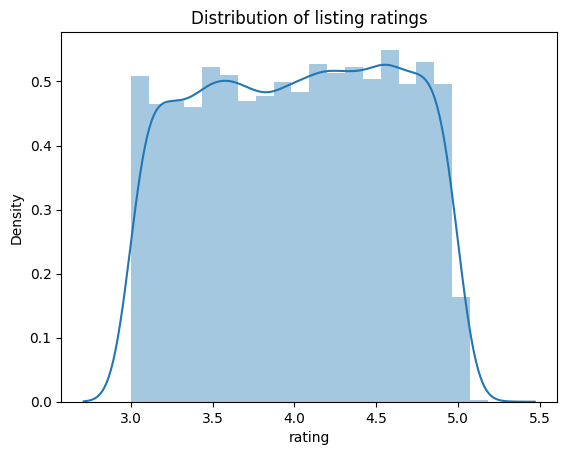

In [ ]:
sns.distplot(airbnb['rating'], bins = 20)
plt.title( 'Distribution of listing ratings')
plt.show()

In [ ]:
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Private', 'Shared room',
       'PRIVATE ROOM', 'home', '   Shared room      '], dtype=object)

In [ ]:
airbnb['room_type'].value_counts()

room_type
Entire home/apt         5120
Private room            4487
Shared room              155
Private                   89
   Shared room            71
home                      66
PRIVATE ROOM              31
Name: count, dtype: int64

In [ ]:
airbnb['coordinates'] = airbnb['coordinates'].str.replace('(', '')
airbnb['coordinates'] = airbnb['coordinates'].str.replace(')', '')
airbnb['coordinates'].head()

0    40.63222, -73.93398
1    40.78761, -73.96862
2     40.7007, -73.99517
3    40.79169, -73.97498
4    40.71884, -73.98354
Name: coordinates, dtype: object

In [ ]:
lat_long = airbnb['coordinates'].str.split(',', expand = True)
lat_long.head()

,0,1
0,40.63222,-73.93398
1,40.78761,-73.96862
2,40.7007,-73.99517
3,40.79169,-73.97498
4,40.71884,-73.98354


In [ ]:
airbnb['latitude'] = lat_long[0]
airbnb['longitude'] = lat_long[1]
airbnb.head()

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","40.63222, -73.93398",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","40.78761, -73.96862",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","40.7007, -73.99517",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15,40.7007,-73.99517
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","40.79169, -73.97498",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","40.71884, -73.98354",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354


In [ ]:
airbnb.dtypes

Unnamed: 0              int64
listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
latitude               object
longitude              object
dtype: object

In [ ]:
airbnb.drop('coordinates', axis = 1, inplace = True)

In [ ]:
airbnb.head()

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15,40.7007,-73.99517
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354


In [ ]:
airbnb['price'].mean()

TypeError: can only concatenate str (not "int") to str

In [ ]:
airbnb['price'] = airbnb['price'].str.strip('$')
airbnb['price'].head()

0     45
1    135
2    150
3     86
4    160
Name: price, dtype: object

In [ ]:
airbnb['price'] = airbnb['price'].astype(float)
airbnb['price'].mean()

150.90512217564665

In [ ]:
airbnb[['listing_added', 'last_review']].head()

,listing_added,last_review
0,2018-06-08,2018-12-12
1,2018-12-25,2019-06-30
2,2018-08-15,NaN
3,2017-03-20,2017-09-23
4,2020-10-23,2019-06-12


In [ ]:
airbnb['listing_added'] = pd.to_datetime(airbnb['listing_added'], format = '%Y-%m-%d')
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'], format = '%Y-%m-%d')

In [ ]:
print(airbnb[['listing_added', 'last_review']].dtypes)

listing_added    datetime64[ns]
last_review      datetime64[ns]
dtype: object


In [ ]:
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Private', 'Shared room',
       'PRIVATE ROOM', 'home', '   Shared room      '], dtype=object)

In [ ]:
airbnb['room_type'] = airbnb['room_type'].str.lower()
airbnb['room_type'].unique()

array(['private room', 'entire home/apt', 'private', 'shared room',
       'home', '   shared room      '], dtype=object)

In [ ]:
airbnb['room_type'] = airbnb['room_type'].str.strip()


In [ ]:
airbnb['room_type'].unique()

array(['private room', 'entire home/apt', 'private', 'shared room',
       'home'], dtype=object)

In [ ]:
mappings = {'private room': 'Private Room',
            'private': 'Private Room',
            'entire home/apt': 'Entire place',
            'shared room': 'Shared room',
            'home': 'Entire place'}

airbnb['room_type'] = airbnb['room_type'].replace(mappings)
airbnb['room_type'].unique()

array(['Private Room', 'Entire place', 'Shared room'], dtype=object)

In [ ]:
airbnb['room_type'].unique()

array(['Private Room', 'Entire place', 'Shared room'], dtype=object)

In [ ]:
airbnb.head()

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands",Private Room,45.0,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side",Entire place,135.0,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights",Entire place,150.0,0,NaT,NaN,65,NaN,NaN,NaN,2018-08-15,40.7007,-73.99517
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side",Entire place,86.0,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side",Private Room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354


In [ ]:
airbnb['neighbourhood_full'].head()

0           Brooklyn, Flatlands
1    Manhattan, Upper West Side
2    Brooklyn, Brooklyn Heights
3    Manhattan, Upper West Side
4    Manhattan, Lower East Side
Name: neighbourhood_full, dtype: object

In [ ]:
borough_neighborhood = airbnb['neighbourhood_full'].str.split(',', expand = True)
borough_neighborhood.head()

,0,1
0,Brooklyn,Flatlands
1,Manhattan,Upper West Side
2,Brooklyn,Brooklyn Heights
3,Manhattan,Upper West Side
4,Manhattan,Lower East Side


In [ ]:
airbnb['borough'] = borough_neighborhood[0]
airbnb['neighborhood'] = borough_neighborhood[1]

In [ ]:
airbnb.head()

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighborhood
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands",Private Room,45.0,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398,Brooklyn,Flatlands
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side",Entire place,135.0,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862,Manhattan,Upper West Side
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights",Entire place,150.0,0,NaT,NaN,65,NaN,NaN,NaN,2018-08-15,40.7007,-73.99517,Brooklyn,Brooklyn Heights
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side",Entire place,86.0,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498,Manhattan,Upper West Side
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side",Private Room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354,Manhattan,Lower East Side


In [ ]:
airbnb.drop('neighbourhood_full', axis = 1, inplace = True)

In [ ]:
airbnb.head()

,Unnamed: 0,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighborhood
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,Private Room,45.0,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398,Brooklyn,Flatlands
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,Entire place,135.0,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862,Manhattan,Upper West Side
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,Entire place,150.0,0,NaT,NaN,65,NaN,NaN,NaN,2018-08-15,40.7007,-73.99517,Brooklyn,Brooklyn Heights
3,3,6425850,"Spacious, charming studio",32715865,Yelena,Entire place,86.0,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498,Manhattan,Upper West Side
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,Private Room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354,Manhattan,Lower East Side


In [ ]:
print(airbnb['borough'].unique())

['Brooklyn' 'Manhattan' 'Queens' 'Bronx' 'Staten Island']


In [ ]:
print(airbnb['neighborhood'].unique())

[' Flatlands' ' Upper West Side' ' Brooklyn Heights' ' Lower East Side'
 ' Greenwich Village' ' Harlem' ' Sheepshead Bay' ' Theater District'
 ' Bushwick' ' Laurelton' ' Mott Haven' ' Flushing' ' Crown Heights'
 ' Midtown' ' Financial District' ' East Village' ' Park Slope'
 ' Washington Heights' ' Williamsburg' ' Chelsea' ' Bedford-Stuyvesant'
 ' Gowanus' ' Upper East Side' ' Ditmars Steinway' ' Cypress Hills'
 " Hell's Kitchen" ' Ridgewood' ' Marble Hill' ' Kips Bay'
 ' Prospect Heights' ' East New York' ' Concord' ' Stapleton' ' Astoria'
 ' East Harlem' ' Sunnyside' ' Gramercy' ' Prospect-Lefferts Gardens'
 ' Sunset Park' ' Forest Hills' ' Windsor Terrace' ' Clinton Hill'
 ' Murray Hill' ' Flatiron District' ' Greenpoint' ' East Flatbush'
 ' Tribeca' ' Woodhaven' ' Fort Greene' ' Inwood' ' Chinatown'
 ' Rockaway Beach' ' Woodside' ' Bayside' ' Bensonhurst' ' SoHo'
 ' Red Hook' ' West Village' ' South Slope' ' Richmond Hill' ' Jamaica'
 ' Boerum Hill' ' St. George' ' Clason Point' ' 

In [ ]:
airbnb[airbnb['rating'] > 5.0]

,Unnamed: 0,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighborhood
1925,1925,36411407,Brand new 1 bedroom steps from Soho!,33917435,Mike,Entire place,150.0,1,2019-07-06,1.0,13,5.017040,1.2,0.870161,2018-12-31,40.71825,-73.99019,Manhattan,Lower East Side
6732,6732,36390226,Comfortable clean Bedstuy private room,267932490,Angela,Private Room,45.0,2,2019-07-08,2.0,14,5.087091,2.4,0.950339,2019-01-02,40.69551,-73.93951,Brooklyn,Bedford-Stuyvesant
8821,8821,36413632,Spacious 2BR in Beautiful Brooklyn Heights,6608220,Matt,Entire place,550.0,1,2019-07-07,1.0,230,5.181114,1.2,0.805418,2019-01-01,40.69827,-73.99649000000002,Brooklyn,Brooklyn Heights


In [ ]:
airbnb.drop(airbnb[airbnb['rating'] > 5.0].index, inplace = True)

In [ ]:
airbnb.head()

,Unnamed: 0,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighborhood
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,Private Room,45.0,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398,Brooklyn,Flatlands
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,Entire place,135.0,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862,Manhattan,Upper West Side
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,Entire place,150.0,0,NaT,NaN,65,NaN,NaN,NaN,2018-08-15,40.7007,-73.99517,Brooklyn,Brooklyn Heights
3,3,6425850,"Spacious, charming studio",32715865,Yelena,Entire place,86.0,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498,Manhattan,Upper West Side
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,Private Room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354,Manhattan,Lower East Side


In [ ]:
airbnb['rating'].max()

4.999561104773598

In [ ]:
airbnb[airbnb['rating'].isna()].describe()

,Unnamed: 0,listing_id,host_id,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
count,2075.000000,2.075000e+03,2.075000e+03,2028.000000,2075.0,0,0.0,2075.000000,0.0,0.0,0.0,2075
mean,4983.181205,2.274238e+07,8.022455e+07,191.553748,0.0,NaT,NaN,104.531566,NaN,NaN,NaN,2018-06-08 17:01:31.951807232
min,2.000000,6.358800e+04,1.475100e+04,0.000000,0.0,NaT,NaN,0.000000,NaN,NaN,NaN,2018-02-03 00:00:00
25%,2461.500000,1.232923e+07,1.224305e+07,70.000000,0.0,NaT,NaN,0.000000,NaN,NaN,NaN,2018-04-05 00:00:00
50%,4987.000000,2.345182e+07,4.040116e+07,120.000000,0.0,NaT,NaN,7.000000,NaN,NaN,NaN,2018-06-05 00:00:00
75%,7390.000000,3.400364e+07,1.333498e+08,205.250000,0.0,NaT,NaN,211.000000,NaN,NaN,NaN,2018-08-13 00:00:00
max,10007.000000,3.648724e+07,2.741034e+08,5250.000000,0.0,NaT,NaN,365.000000,NaN,NaN,NaN,2018-10-17 00:00:00
std,2874.009469,1.123730e+07,8.663163e+07,316.186639,0.0,NaN,NaN,138.266525,NaN,NaN,NaN,NaN


In [ ]:
airbnb = airbnb.fillna({'reviews_per_month':0, 'number_of_stays':0,
                        '5_stars':0})

is_rated =np.where(airbnb['rating'].isna(), 0, 1)
airbnb['is_rated'] = is_rated

Tasks  : deal with missing values in price

In [ ]:
duplicates = airbnb.duplicated(subset = 'listing_id', keep = False)
airbnb[duplicates]

,Unnamed: 0,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighborhood,is_rated
77,77,7319856,450ft Square Studio in Gramercy NY,11773680,Adam,Entire place,289.0,4,2016-05-22,0.09,225,3.903764,4.8,0.756381,2015-11-17,40.73813,-73.98098,Manhattan,Kips Bay,1
368,368,17861841,THE CREATIVE COZY ROOM,47591528,Janessa,Private Room,99.0,13,2019-05-23,0.52,82,4.806590,15.6,0.937422,2018-11-17,40.59211,-73.94126999999997,Brooklyn,Sheepshead Bay,1
555,555,9078222,"Prospect Park 3 bdrm, Sleeps 8 (#2)",47219962,Babajide,Entire place,154.0,123,2019-07-01,2.74,263,3.466881,147.6,0.738191,2018-12-26,40.66086,-73.96159,Brooklyn,Prospect-Lefferts Gardens,1
1145,1145,253806,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Entire place,199.0,43,2019-07-02,0.47,60,4.620238,51.6,0.861086,2018-12-27,40.73652,-73.95236,Brooklyn,Greenpoint,1
1338,1338,32610834,Manhattan by the water!,12132369,Omar,Entire place,150.0,0,NaT,0.00,9,NaN,0.0,0.000000,2018-06-28,40.73767,-73.97384,Manhattan,Kips Bay,0
1481,1481,15027024,Newly renovated 1bd on lively & historic St Marks,8344620,Ethan,Entire place,180.0,10,2018-12-31,0.30,0,3.969729,12.0,0.772513,2018-06-27,40.72693,-73.98385,Manhattan,East Village,1
1658,1658,35646737,"Private Cabins @ Chelsea, Manhattan",117365574,Maria,Private Room,85.0,1,2019-06-22,1.00,261,4.951714,1.2,0.671388,2018-12-17,40.74946,-73.99627,Manhattan,Chelsea,1
2118,2118,33346762,2BR Apartment in Brownstone Brooklyn!,50321289,Avery,Entire place,140.0,4,2019-06-14,1.58,4,4.013393,4.8,0.719591,2018-12-09,40.682,-73.95681,Brooklyn,Bedford-Stuyvesant,1
2255,2255,7319856,450ft Square Studio in Gramercy NY,11773680,Adam,Entire place,280.0,4,2016-05-22,0.09,225,3.903764,4.8,0.756381,2015-11-17,40.73813,-73.98098,Manhattan,Kips Bay,1
2871,2871,4244242,Best Bedroom in Bedstuy/Bushwick. Ensuite bath...,22023014,BrooklynSleeps,Private Room,70.0,110,2019-06-23,1.96,323,4.962314,132.0,0.809882,2018-12-18,40.69496,-73.93949,Brooklyn,Bedford-Stuyvesant,1


In [ ]:
airbnb[duplicates].sort_values(by = 'listing_id')

,Unnamed: 0,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighborhood,is_rated
1145,1145,253806,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Entire place,199.0,43,2019-07-02,0.47,60,4.620238,51.6,0.861086,2018-12-27,40.73652,-73.95236,Brooklyn,Greenpoint,1
6562,6562,253806,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Entire place,199.0,43,2019-07-02,0.47,60,4.620238,51.6,0.861086,2018-12-27,40.73652,-73.95236,Brooklyn,Greenpoint,1
8699,8699,2044392,The heart of Williamsburg 2 bedroom,620218,Sarah,Entire place,245.0,0,NaT,0.00,0,NaN,0.0,0.000000,2018-08-09,40.71257,-73.96149,Brooklyn,Williamsburg,0
5761,5761,2044392,The heart of Williamsburg 2 bedroom,620218,Sarah,Entire place,250.0,0,NaT,0.00,0,NaN,0.0,0.000000,2018-05-24,40.71257,-73.96149,Brooklyn,Williamsburg,0
4187,4187,4244242,Best Bedroom in Bedstuy/Bushwick. Ensuite bath...,22023014,BrooklynSleeps,Private Room,73.0,110,2019-06-23,1.96,323,4.962314,132.0,0.809882,2018-12-18,40.69496,-73.93949,Brooklyn,Bedford-Stuyvesant,1
2871,2871,4244242,Best Bedroom in Bedstuy/Bushwick. Ensuite bath...,22023014,BrooklynSleeps,Private Room,70.0,110,2019-06-23,1.96,323,4.962314,132.0,0.809882,2018-12-18,40.69496,-73.93949,Brooklyn,Bedford-Stuyvesant,1
77,77,7319856,450ft Square Studio in Gramercy NY,11773680,Adam,Entire place,289.0,4,2016-05-22,0.09,225,3.903764,4.8,0.756381,2015-11-17,40.73813,-73.98098,Manhattan,Kips Bay,1
2255,2255,7319856,450ft Square Studio in Gramercy NY,11773680,Adam,Entire place,280.0,4,2016-05-22,0.09,225,3.903764,4.8,0.756381,2015-11-17,40.73813,-73.98098,Manhattan,Kips Bay,1
555,555,9078222,"Prospect Park 3 bdrm, Sleeps 8 (#2)",47219962,Babajide,Entire place,154.0,123,2019-07-01,2.74,263,3.466881,147.6,0.738191,2018-12-26,40.66086,-73.96159,Brooklyn,Prospect-Lefferts Gardens,1
7933,7933,9078222,"Prospect Park 3 bdrm, Sleeps 8 (#2)",47219962,Babajide,Entire place,150.0,123,2019-07-01,2.74,263,3.466881,147.6,0.738191,2018-12-26,40.66086,-73.96159,Brooklyn,Prospect-Lefferts Gardens,1


In [ ]:
airbnb = airbnb.drop_duplicates()

In [ ]:
airbnb = airbnb.duplicated(subset = 'listing_id', keep = False)
airbnb[duplicates]

77      True
368     True
555     True
1145    True
1338    True
1481    True
1658    True
2118    True
2255    True
2871    True
3007    True
3065    True
3340    True
3430    True
4187    True
5025    True
5077    True
5236    True
5246    True
5251    True
5397    True
5454    True
5761    True
5861    True
6068    True
6085    True
6132    True
6313    True
6438    True
6562    True
6832    True
7116    True
7155    True
7316    True
7769    True
7933    True
8699    True
9265    True
9322    True
9425    True
dtype: bool

In [ ]:
airbnb[duplicates]

77      True
368     True
555     True
1145    True
1338    True
1481    True
1658    True
2118    True
2255    True
2871    True
3007    True
3065    True
3340    True
3430    True
4187    True
5025    True
5077    True
5236    True
5246    True
5251    True
5397    True
5454    True
5761    True
5861    True
6068    True
6085    True
6132    True
6313    True
6438    True
6562    True
6832    True
7116    True
7155    True
7316    True
7769    True
7933    True
8699    True
9265    True
9322    True
9425    True
dtype: bool

In [ ]:
airbnb[airbnb.duplicated('listing_id', keep = False)]

TypeError: Series.duplicated() got multiple values for argument 'keep'

In [ ]:
airbnb = airbnb.groupby('listing_id').agg(aggregations).reset_index()